In [34]:
DATA_DIR = '../data/'
MODEL_DIR = '../models/'

In [35]:
import os

import pandas as pd
import numpy as np
np.set_printoptions(suppress=True)

In [36]:
df = pd.read_csv(os.path.join(DATA_DIR, 'preprocessed.csv'))
df.head()

,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Master,PhD,Absurd,Alone,Divorced,Married,Single,Together,Widow,YOLO
0,1957,58138.0,0,0,3110400000000000,58,635,88,546,172,...,0,0,0,0,0,0,1,0,0,0
1,1954,46344.0,1,1,50630400000000000,38,11,1,6,2,...,0,0,0,0,0,0,1,0,0,0
2,1965,71613.0,0,0,33436800000000000,26,426,49,127,111,...,0,0,0,0,0,0,0,1,0,0
3,1984,26646.0,1,0,48384000000000000,26,11,4,20,10,...,0,0,0,0,0,0,0,1,0,0
4,1981,58293.0,1,0,46483200000000000,94,173,43,118,46,...,0,1,0,0,0,1,0,0,0,0


In [37]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [38]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

In [39]:
pca_ = PCA(n_components=30)
X_pca = pca_.fit_transform(X_scaled)

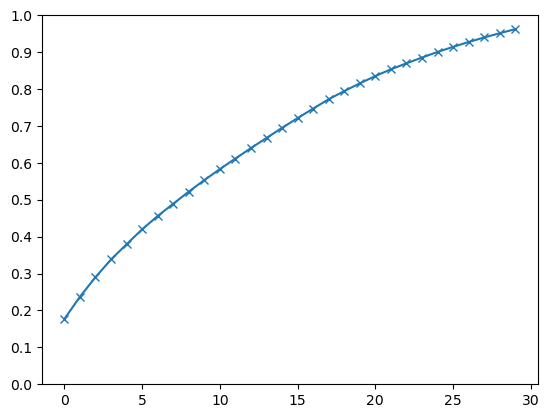

In [40]:
plt.plot(np.cumsum(pca_.explained_variance_ratio_), 'x-')
plt.yticks(np.arange(0,1.01,0.1))
plt.show()

In [41]:
with open(os.path.join(DATA_DIR, 'X_scaled.npy'), 'wb') as f:
    np.save(f, X_scaled)
with open(os.path.join(DATA_DIR, 'X_pca.npy'), 'wb') as f:
    np.save(f, X_pca)

In [42]:
import pickle

In [43]:
with open(os.path.join(MODEL_DIR, 'scaler.pickle'), 'wb') as f:
    pickle.dump(scaler, f)
with open(os.path.join(MODEL_DIR, 'pca.pickle'), 'wb') as f:
    pickle.dump(pca_, f)